In [1]:
import pandas as pd

df = pd.read_csv('chicagodata.csv')

1ZBLluhq50cQZMU8_SNt2sXSIRnAGKq6f


In [0]:
import folium
import seaborn as sns


In [0]:
#plt.figure(figsize=(10,7))
#sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
df = df.dropna()
df = df.drop(columns=[ 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

In [6]:
pd.value_counts(df['Location Description'])[:10]


STREET                            1573157
RESIDENCE                         1010782
APARTMENT                          656630
SIDEWALK                           625261
OTHER                              226568
PARKING LOT/GARAGE(NON.RESID.)     172918
ALLEY                              136967
SCHOOL, PUBLIC, BUILDING           127445
RESIDENCE-GARAGE                   118401
SMALL RETAIL STORE                 109302
Name: Location Description, dtype: int64

In [7]:
pd.value_counts(df['Primary Type'])[:10]

THEFT                  1283742
BATTERY                1111839
CRIMINAL DAMAGE         698141
NARCOTICS               636025
ASSAULT                 378119
OTHER OFFENSE           377246
BURGLARY                354731
MOTOR VEHICLE THEFT     279210
DECEPTIVE PRACTICE      234392
ROBBERY                 231757
Name: Primary Type, dtype: int64

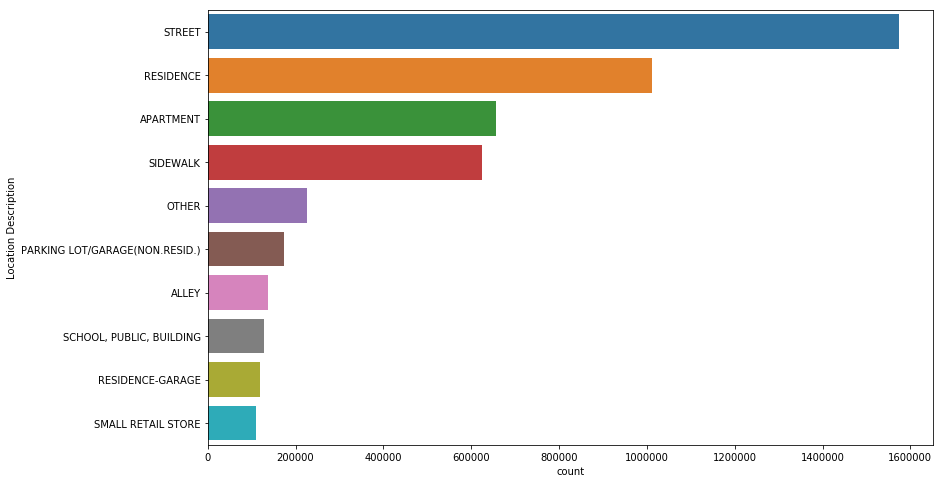

In [55]:
plt.figure(figsize = (13, 8))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

In [0]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [0]:
locations = df.groupby('Community Area').first()

In [0]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]


In [13]:
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,STREET,False
1.0,42.005362,-87.671555,OTHER,False
2.0,41.993282,-87.709221,APARTMENT,True
3.0,41.964014,-87.670899,RESIDENCE,False
4.0,41.983957,-87.689461,STREET,False


In [0]:
popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""

In [0]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [16]:
chicago_map

In [18]:
unique_locations = df['Location'].value_counts()
unique_locations.index

Index(['(41.976290414, -87.905227221)', '(41.754592961, -87.741528537)',
       '(41.883500187, -87.627876698)', '(41.897895128, -87.624096605)',
       '(41.896888586, -87.628203192)', '(41.909664252, -87.742728815)',
       '(41.885487535, -87.726422045)', '(41.904192368, -87.647000785)',
       '(41.788987036, -87.74147999)', '(41.88233367, -87.627841791)',
       ...
       '(41.921674274, -87.699226167)', '(41.984546131, -87.800581478)',
       '(41.989406542, -87.661531615)', '(41.828969306, -87.60807886)',
       '(41.784768793, -87.713333248)', '(41.90234186, -87.746862721)',
       '(41.751976633, -87.714766671)', '(41.989235695, -87.778508966)',
       '(41.917379833, -87.782802365)', '(41.950417575, -87.768118766)'],
      dtype='object', length=642160)

In [19]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.976290414, -87.905227221)",12647
1,"(41.754592961, -87.741528537)",9163
2,"(41.883500187, -87.627876698)",6862
3,"(41.897895128, -87.624096605)",4226
4,"(41.896888586, -87.628203192)",3058


In [0]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [0]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [0]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

In [23]:
%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

CPU times: user 148 ms, sys: 3.96 ms, total: 152 ms
Wall time: 152 ms


In [24]:
chicago_map_crime

In [0]:
df_theft = df[df['Primary Type'] == 'THEFT']

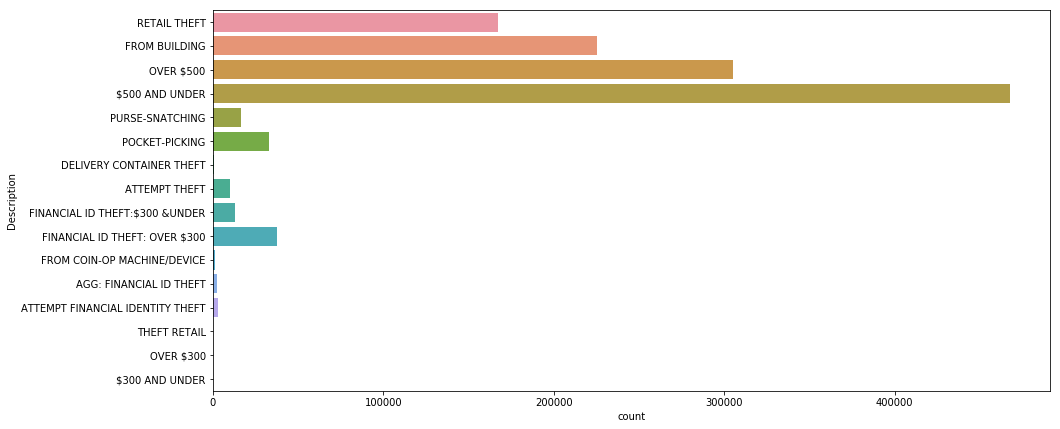

In [26]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

In [0]:
df_theft_data = pd.DataFrame({"Counts": df_theft['Description'].value_counts(), "Description" : df_theft['Description'].value_counts().index})

In [0]:
df_theft_data.reset_index(inplace=True)


In [29]:
df_theft_data = df_theft_data.drop(columns=['index'], axis = 1)
df_theft_data.head()

,Counts,Description
0,467527,$500 AND UNDER
1,305221,OVER $500
2,225447,FROM BUILDING
3,167259,RETAIL THEFT
4,37857,FINANCIAL ID THEFT: OVER $300


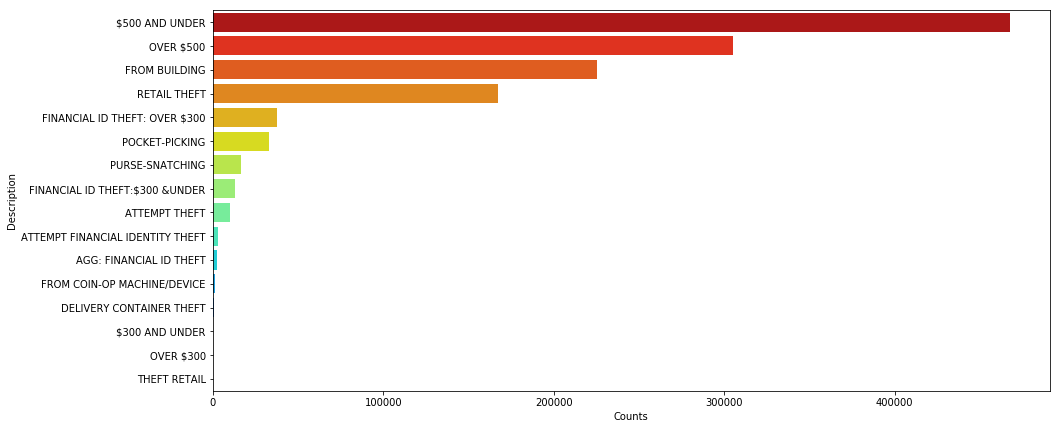

In [30]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_theft_data, palette="jet_r")

In [31]:
%%time
df_theft['Date'] = pd.to_datetime(df_theft['Date'])

CPU times: user 4min 34s, sys: 0 ns, total: 4min 34s
Wall time: 4min 34s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_theft['Month'] = df_theft['Date'].apply(lambda x : x.month)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
theft_in_months = pd.DataFrame({"thefts" : df_theft['Month'].value_counts(), "month" : df_theft["Month"].value_counts().index}, index = range(12))

In [0]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [35]:
theft_in_months.head()

,thefts,month
10,118064.0,1
11,105110.0,2
9,117502.0,3
7,129023.0,4
5,112126.0,5


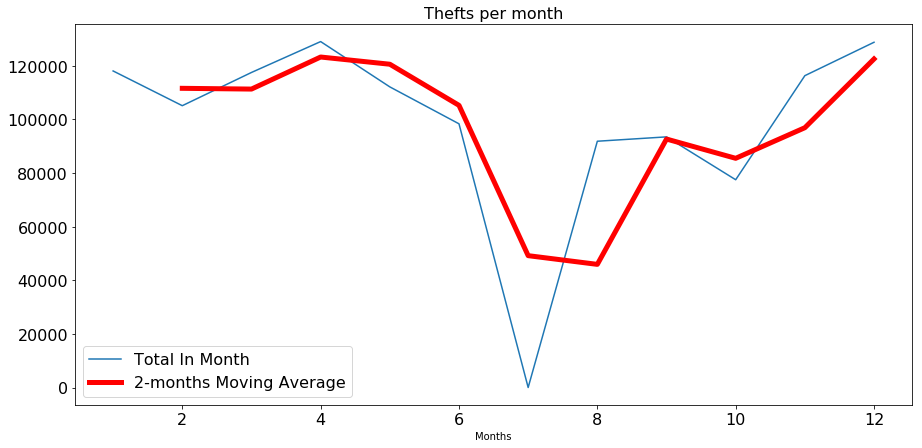

In [37]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='red', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [36]:
print(max(df_theft['Date']))
print(min(df_theft['Date']))

2018-11-28 23:45:00
2001-01-01 00:00:00


In [38]:
df_theft['Date'].iloc[0].date()

datetime.date(2015, 3, 18)

In [39]:
df_theft_dates = df_theft['Location']
df_theft_dates.index = df_theft['Date']
resampled = df_theft_dates.resample('D')
df_theft_dates['MEAN'] = resampled.size().mean()
df_theft_dates['STD'] = resampled.size().std()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-pac

In [0]:
UCL = df_theft_dates['MEAN'] + 3 * df_theft_dates['STD']
LCL = df_theft_dates['MEAN'] -  3 * df_theft_dates['STD']

CPU times: user 90.9 ms, sys: 1.11 ms, total: 92 ms
Wall time: 92.8 ms


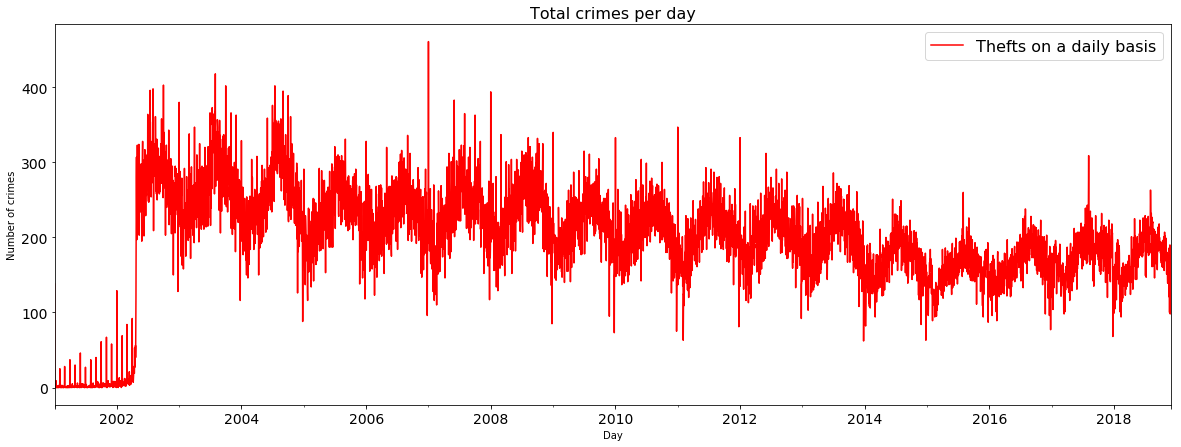

In [41]:
%%time

plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
# plt.plot(y = UCL,x = resampled.index, color='red', ls='--', linewidth=1.5, label='UCL')

# LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
# df_theft_dates['MEAN'].plot(color='red', linewidth=2, label='Average')

plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [42]:
resampled.size().std()

71.87935339534008

In [0]:
df_public_peace =  df[df['Primary Type'] == 'PUBLIC PEACE VIOLATION']

In [44]:
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()

,Counts,Description
0,27837,RECKLESS CONDUCT
1,4972,BOMB THREAT
2,3992,ARSON THREAT
3,2163,FALSE POLICE REPORT
4,1687,OTHER VIOLATION


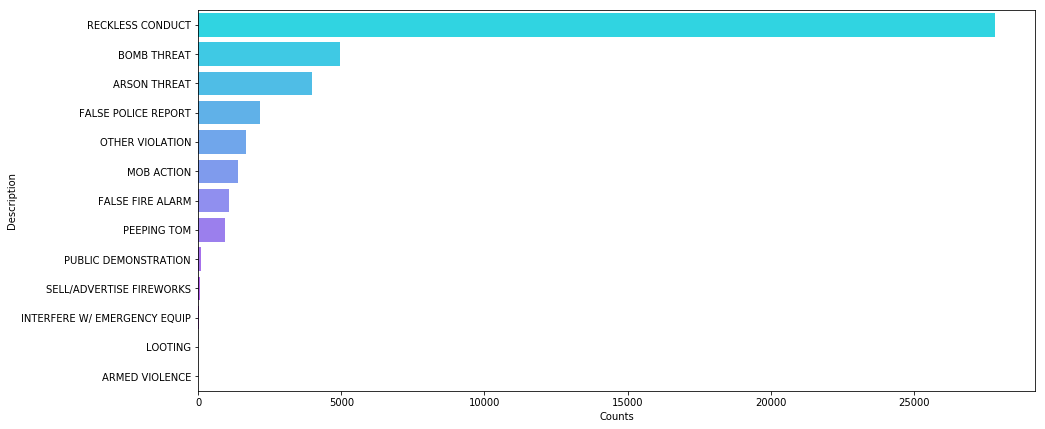

In [45]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")

In [0]:
unique_locations_bombs = df_public_peace['Location'].value_counts()

In [47]:
PB_index = pd.DataFrame({"Raw_String" : unique_locations_bombs.index, "ValueCount":unique_locations_bombs})
PB_index.index = range(len(unique_locations_bombs))
PB_index.head()

,Raw_String,ValueCount
0,"(41.877585867, -87.683123746)",173
1,"(41.881524451, -87.662706932)",173
2,"(41.78210152, -87.586502002)",171
3,"(41.754168689, -87.601635756)",157
4,"(41.807650669, -87.643080489)",155


In [0]:
PB_index['LocationCoord'] = PB_index['Raw_String'].apply(Location_extractor)
PB_index  = PB_index.drop(columns=['Raw_String'], axis = 1)

In [0]:
chicago_crime_pp = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13)

In [0]:
for i in range(500):
    lat = PB_index['LocationCoord'].iloc[i][0]
    long = PB_index['LocationCoord'].iloc[i][1]
    radius = PB_index['ValueCount'].iloc[i] / 3
    
    if PB_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               PB_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_pp)

In [51]:
folium.TileLayer('cartodbpositron').add_to(chicago_crime_pp)

In [52]:
chicago_crime_pp